In [25]:
### 这个文件尝试了 LFR网络的生成 用Louvain方法做了聚类 最后计算了与内生聚类的 NMI
###
# 导入 networkx 包并给定参数生成 LFR 图
import networkx as nx

from networkx.generators.community import LFR_benchmark_graph


n = 250

tau1 = 2.5

tau2 = 1.5

mu = 0.25

G = LFR_benchmark_graph(

    n, tau1, tau2, mu, average_degree=6, min_community=30, seed=7

)

#nx.draw(G, pos=nx.spring_layout(G),node_color='r', node_size=3, edge_color='b')

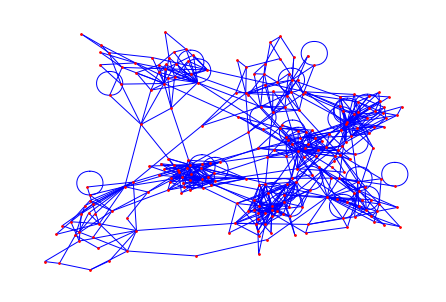

In [2]:
nx.draw(G, pos=nx.spring_layout(G),node_color='r', node_size=3, edge_color='b')

In [26]:
# LFR 图是有内在的社群结构的，每个节点的社群存储在其 community 属性中，是一个 set
# 通过运行循环，按照内在的社群结构给每个节点一个标签 即为其 intrinsic_membership
# 为了方便 intrinsic_membership 一开始是作为一个 dict 存储的，后来将其转化为一个 list
intrinsic_communities = {frozenset(G.nodes[v]["community"]) for v in G}
intrinsic_membership = {}
for node in range(G.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break
intrinsic_membership = list(intrinsic_membership.values())
# Print the labels
#for number, label in membership.items():
#    print(f"Number {number} belongs to {label}")

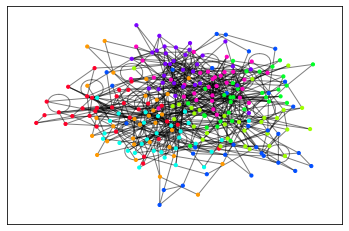

In [27]:
# 对于每个节点，按照其 intrinsic_membership 着色画图
from community import community_louvain
import matplotlib
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      pos,
                      #intrinsic_membership.keys(),
                      node_size=10,
                      cmap=matplotlib.colormaps.get_cmap('gist_rainbow'),
                      node_color=intrinsic_membership
                      )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

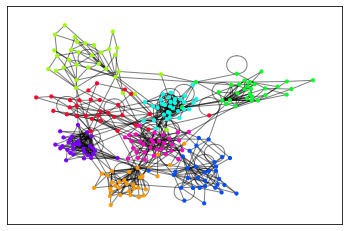

In [5]:
# 利用 Louvain 算法进行社群识别并画图
# louvain_membership 一开始是作为一个 dict 给出的，后来将其转化为一个 list
from community import community_louvain
import matplotlib
import matplotlib.pyplot as plt


louvain_membership = list(community_louvain.best_partition(G).values())

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      pos,
                      #louvain_membership.keys(),
                      node_size=10,
                      cmap=matplotlib.colormaps.get_cmap('gist_rainbow'),
                      node_color=louvain_membership
                      )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [6]:
# 计算 
# 内在的社群结构 intrinsic_membership 和
# Louvain 算法给出的 louvain_membership 
# 的 NMI
from sklearn.metrics import normalized_mutual_info_score

# Calculate the NMI
nmi = normalized_mutual_info_score(louvain_membership, intrinsic_membership)

print("NMI:", nmi)


NMI: 1.0


In [7]:
print(f"The network has {max(intrinsic_membership)+1} intrinsic communities.")
print(f"Louvain algorithm gives {max(louvain_membership)+1} communities.")

The network has 8 intrinsic communities.
Louvain algorithm gives 8 communities.


In [8]:
from collections import Counter

frequency = Counter(louvain_membership)

print(frequency)

Counter({2: 32, 1: 32, 5: 32, 4: 32, 7: 32, 3: 30, 6: 30, 0: 30})
